In [1]:
# My trip: end by 8/23/17 to be part of the dateset? 10 day trip....

# Import Dependencies

#import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import pandas as pd
#import os
from pylab import *

from datetime import date, time, datetime, timedelta
from dateutil.relativedelta import relativedelta
# from datetime import time
# from datetime import datetime

# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, inspect, func#, MetaData
#from sqlalchemy.ext.declarative import declarative_base

# Allow us to declare column types
#from sqlalchemy import Column, Integer, String, Float

# import pymysql
# pymysql.install_as_MySQLdb()

today = date.today()
print(today)

now = datetime.now()
print(now.strftime('%m/%d/%y'))

d = now - timedelta(years=1)
print(d)



new_date = (now + relativedelta(years=1)).date()
print(new_date)

type(new_date)

print(new_date.strftime('%Y/%m/%d'))

## Database Setup

In [2]:
# Create an engine to the SQLite database file called `hawaii.sqlite`
engine = create_engine("sqlite:///hawaii.sqlite")

In [3]:
# Check for tables
engine.table_names()

['measurements', 'stations']

In [4]:
engine.execute('SELECT * FROM measurements LIMIT 10').fetchall()

[(1, 'USC00519397', '2010-01-01', 0.08, 65),
 (2, 'USC00519397', '2010-01-02', 0.0, 63),
 (3, 'USC00519397', '2010-01-03', 0.0, 74),
 (4, 'USC00519397', '2010-01-04', 0.0, 76),
 (5, 'USC00519397', '2010-01-06', 0.0490204841713224, 73),
 (6, 'USC00519397', '2010-01-07', 0.06, 70),
 (7, 'USC00519397', '2010-01-08', 0.0, 64),
 (8, 'USC00519397', '2010-01-09', 0.0, 68),
 (9, 'USC00519397', '2010-01-10', 0.0, 73),
 (10, 'USC00519397', '2010-01-11', 0.01, 64)]

In [5]:
inspector = inspect(engine)
columns = inspector.get_columns('stations')
for c in columns:
    print(c['name'], c["type"])

station VARCHAR
name VARCHAR
latitude FLOAT
longitude FLOAT
elevation FLOAT


In [6]:
inspector = inspect(engine)
columns = inspector.get_columns('measurements')
for c in columns:
    print(c['name'], c["type"])

id INTEGER
station VARCHAR
date VARCHAR
prcp FLOAT
tobs INTEGER


## Reflect and query dates

In [7]:
# reflect an existing database into a new model
Base = automap_base()

# reflect the tables
Base.prepare(engine, reflect=True)

# Save references to the table
Measurement = Base.classes.measurements
Station = Base.classes.stations

# Create our session (link) from Python to the DB
session = Session(engine)

## Precipitation Analysis

In [8]:
# # Write a function called `calc_temps` that will accept start date and end date in the format '%Y-%m-%d' 
# # and return the minimum, average, and maximum temperatures for that range of dates
# def calc_temps(start_date, end_date):
#     """TMIN, TAVG, and TMAX for a list of dates.
    
#     Args:
#         start_date (string): A date string in the format %Y-%m-%d
#         end_date (string): A date string in the format %Y-%m-%d
        
#     Returns:
#         TMIN, TAVE, and TMAX
#     """
    
#     return session.query(func.min(Measurement.tobs), func.avg(Measurement.tobs), func.max(Measurement.tobs)).\
#         filter(Measurement.date >= start_date).filter(Measurement.date <= end_date).all()
# print(calc_temps('2012-02-28', '2012-03-05'))

In [9]:
#last_12 = session.query(Measurement).filter_by(func.strftime("%m/%d/%y", Measurement.date) >= "5/10/15")
#last_12 = session.query(Measurement).filter(func.strftime("%m/%d/%y", Measurement.date) > "5/10/15")

## WHY NOT WORKING?
#tobs_high = session.query(Measurement).filter_by(tobs == 80).all()

# id_print = session.query(Measurement).filter_by(id=5).count()
# print(id_print)


### WORKS
# thing = session.query(Measurement).filter_by(tobs = 80).count()
# print(thing)
# stuff = session.query(Measurement).filter(Measurement.tobs > 80).count()
# print(stuff)

#update_one = session.query(Garbage).filter(Garbage.id == 1).first()


## NOT YET
# target = session.query(Measurement.date).filter(func.strftime("%m/%d/%y", Measurement.date) > "5/10/15").count()
# print(target)

# attacks = session.query(Measurement) 
# for x in attacks:
#     print(x.tobs)

#last_12 = session.query(Measurement).filter(func.strftime("%m/%d/%y", Measurement.date) > "5/10/15")


#filter(func.strftime("%m", Dow.date) == "05")
#year_2017 = session.query(Sharks).filter_by(year=2017).count()
# for item in tobs_high:
#     print(item.tobs)
### END SOLUTION

In [10]:
# these = session.query(Measurement.tobs, Measurement.date).filter(Measurement.tobs > 80).all()
# print(these)

In [36]:
# Retrieve the last 12 months of precipitation data by finding the maximum date in the table and subtracting one year.
# Select average prcp value by date and date.

max_date = session.query(func.max(func.strftime("%Y/%m/%d", Measurement.date))).all()
max_date = datetime.strptime(max_date[0][0], "%Y/%m/%d").date()

sel = [Measurement.date, func.avg(Measurement.prcp)]

prcp_twelve_months = session.query(*sel).\
    filter(Measurement.date >= (max_date - relativedelta(years=1))).\
    group_by(Measurement.date).all()
#print(prcp_twelve_months)

In [45]:
# Convert selected data to be loaded into a Pandas Dataframe

prcp_twelve_months_dict = dict(prcp_twelve_months)

prcp_twelve_months_df = pd.DataFrame.from_dict(prcp_twelve_months_dict, orient='index', dtype=None)

prcp_twelve_months_df = prcp_twelve_months_df.reset_index()
prcp_twelve_months_df.columns = ['date', 'prcp']
prcp_twelve_months_df = prcp_twelve_months_df.set_index('date')
#prcp_twelve_months_df

In [14]:
# Use Pandas to give summary statistics of precipitation data

prcp_twelve_months_df.describe()

,prcp
count,366.000000
mean,0.168242
std,0.273743
min,0.000000
25%,0.020743
50%,0.080590
75%,0.186200
max,2.049086


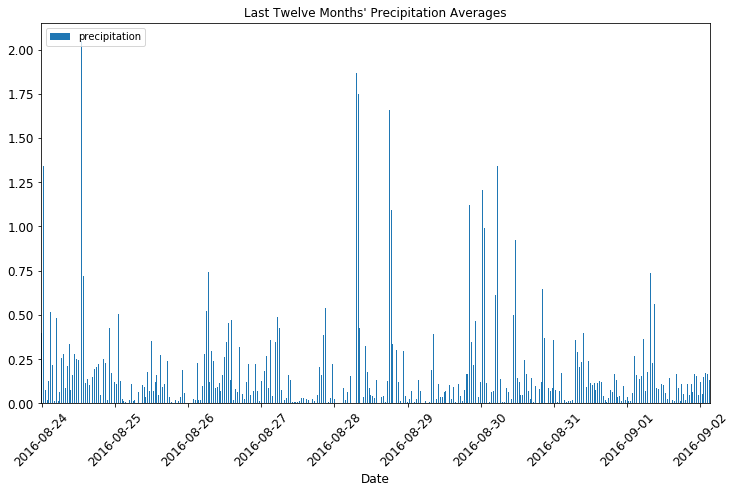

In [43]:
# Plot the precipitation data indexed by date

ax = prcp_twelve_months_df.plot(kind='bar', title ="Last Twelve Months' Precipitation Averages",figsize=(12,7),legend=True, fontsize=12)
ax.set_xlabel("Date",fontsize=12)

ax.xaxis.set_major_locator(MaxNLocator(10))
plt.xticks(rotation=45)
plt.legend(["precipitation"],loc="upper left")

plt.show()

## Station Analysis

In [ ]:


## Design a query to find the most active stations.

# List the stations and observation counts in descending order

# Which station has the highest number of observations?

# Design a query to retrieve the last 12 months of temperature observation data (tobs).

# Filter by the station with the highest number of observations.

# Plot the results as a histogram with bins=12.

In [54]:
# Calculate the total number of stations.
number_of_stations = session.query(Station.station).count()
number_of_stations

9

In [59]:
# Find most active stations:
# List stations and obervation counts in descending order

sel = [Station.station, Station.name, func.count(Measurement.tobs)]

activity_desc = session.query(*sel).\
    filter(Station.station == Measurement.station).\
    group_by(Measurement.station).\
    order_by(func.count(Measurement.tobs).desc()).all()
    
activity_desc

[('USC00519281', 'WAIHEE 837.5, HI US', 2772),
 ('USC00519397', 'WAIKIKI 717.2, HI US', 2724),
 ('USC00513117', 'KANEOHE 838.1, HI US', 2709),
 ('USC00519523', 'WAIMANALO EXPERIMENTAL FARM, HI US', 2669),
 ('USC00516128', 'MANOA LYON ARBO 785.2, HI US', 2612),
 ('USC00514830', 'KUALOA RANCH HEADQUARTERS 886.9, HI US', 2202),
 ('USC00511918', 'HONOLULU OBSERVATORY 702.2, HI US', 1979),
 ('USC00517948', 'PEARL CITY, HI US', 1372),
 ('USC00518838', 'UPPER WAHIAWA 874.3, HI US', 511)]

In [70]:
# Display most active station

most_active_station = activity_desc[0][0:2]
most_active_station

('USC00519281', 'WAIHEE 837.5, HI US')

In [72]:
# Retrieve last 12 months of temperature observation data ('tobs') for station with highest number of observations 

sel = [Measurement.station, Measurement.tobs]

# prcp_twelve_months = session.query(*sel).\
#     filter(Measurement.date >= (max_date - relativedelta(years=1))).\
#     group_by(Measurement.date).all()
# #print(prcp_twelve_months)

# tobs12_data = session.query(Measurements.station, Measurements.tobs).\
# filter(Measurements.station == max_stations_activity[0]).\
# filter(func.strftime("%YY/%m/%d", Measurements.date)>= "2016-01-01").all()

tobs_twelve_months = session.query(*sel).\
    filter(Measurement.station == most_active_station[0]).\
    filter(Measurement.date >= (max_date - relativedelta(years=1))).all()
    
#print(tobs_twelve_months)
    

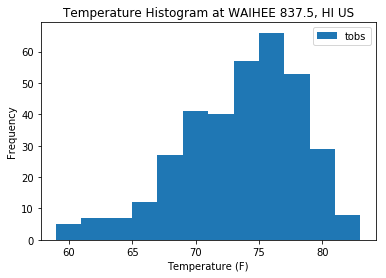

In [75]:
# Plot a histogram of frequency of temperature observations for most active station

temps = [x[1] for x in tobs_twelve_months]
plt.hist(temps, bins=12)
plt.xlabel("Temperature (F)")
plt.ylabel("Frequency")
plt.title("Temperature Histogram at %s" % (most_active_station[1]))
plt.legend(["tobs"],loc="upper right")
plt.show()


In [58]:
# activity_desc_dict = dict(activity_desc)

# activity_desc_df = pd.DataFrame.from_dict(activity_desc_dict, orient='index', dtype=None)

# activity_desc_df = activity_desc_df.reset_index()

ValueError: dictionary update sequence element #0 has length 3; 2 is required

In [44]:
# ax.bar(prcp_twelve_months_df['prcp'], prcp_twelve_months_df['date'])
# plt.show()

In [22]:
# plt.bar(prcp_twelve_months_df.index, prcp_twelve_months_df['prcp'])
# plt.show()

In [23]:
# # Retrieve the last 12 months of precipitation data.
# # Select only the date and prcp values.

# max_date = session.query(func.max(func.strftime("%Y/%m/%d", Measurement.date))).all()
# max_date = datetime.strptime(max_date[0][0], "%Y/%m/%d").date()

# # one_year = (max_date - relativedelta(years=1))


# # sel = [Measurement.date, Measurement.prcp]

# sel = [Measurement.date, 
#        func.avg(Measurement.prcp)]

# # test2 = session.query(*sel).\
# #     filter(Measurement.date >= one_year).all()
# # print(test2)


# # YES!!
# # test3 = session.query(*sel).\
# #     filter(Measurement.date >= (max_date - relativedelta(years=1))).all()
# # print(test3)

# test4 = session.query(*sel).\
#     filter(Measurement.date >= (max_date - relativedelta(years=1))).\
#     group_by(Measurement.date).all()
# print(test4)



In [24]:


# # sel = [Measurement.date, 
# #        func.avg(Measurement.prcp)]

# sel = [Measurement.date, Measurement.prcp]

# # precipitation_12_months = session.query(*sel).\
# #     filter(func.strftime("%m/%d/%y", Measurement.date) >= "5/10/15").all()
    
# precipitation_sample = session.query(*sel).\
#     filter(func.strftime("%YY/%m/%d", Measurement.date) >= "2015/10/15").all()

# # precipitation_12_months = session.query(*sel).\
# #     filter(func.strftime("%m/%d/%y", Measurement.date) >= "5/10/15").\
# #     group_by(Measurement.date).\
# #     order_by(Measurement.date).all()

# print(precipitation_sample)

In [25]:
# max_date = session.query(func.max(func.strftime("%Y/%m/%d", Measurement.date))).all()
# print(max_date)

In [26]:
# #dates_list = [dt.datetime.strptime(date, '"%Y-%m-%d"').date() for date in dates]

# # print(max_date[0])
# # print(max_date[0][0])

# #type(max_date[0][0])

# jessica = datetime.strptime(max_date[0][0], "%Y/%m/%d").date()
# # type(jessica)
# print(jessica)

# # james = datetime.strptime(max_date[0][0], "%Y/%m/%d").date()
# # # type(james)
# # print(james)

# # datetime.strptime(max_date[0], "%Y/%m/%d")

# # james = datetime.strptime(max_date[0], "%Y/%m/%d")
# # print(james)
# # type(james)
# #max_date = datetime(max_date)

In [27]:
# max_date = datetime.strptime(max_date[0][0], "%Y/%m/%d").date()
# #

In [28]:
#attacks = session.query(Sharks) 
# for attack in attacks:
#     print(attack.location)

In [29]:
# for x in precipitation_12_months:
#     print(x.prcp)

In [30]:
# if '2017-10-1' <= '2017-9-31':
#     print ("True")

In [31]:
# type(max_date)

In [32]:
# print(max_date)

In [49]:
# # new_date = (now + relativedelta(years=1)).date()
# # print(new_date)

# one_year = (max_date - relativedelta(years=1))
# print(one_year)

In [50]:
# ### THIS ISNT WORKING - RETURNS BACK TO JAN 2016

# test = session.query(*sel).\
#     filter(func.strftime("%Y/%m/%d", Measurement.date) >= one_year).all()
    
# # precip = session.query(*sel).\
# #     filter(datetime.strptime("%Y/%m/%d", Measurement.date) >= one_year)
  
    
# # test = session.query(*sel).\
# #     filter(func.strftime("%YY/%m/%d", Measurement.date) >= "2016/08/15").all()
    
# print(test)